# Análise RH IBM Dataset

### Introdução

Este é um conjunto de dados criado por cientistas de dados da IBM para analisar os fatores que levam ao desgaste dos funcionários. Neste caderno, construiremos um sistema que prevê o desgaste dos funcionários. Primeiro, faremos um pré-processamento, análise exploratória de dados e, em seguida, construiremos e compararemos 3 modelos de classificação diferentes. Haverá comentários a cada passo do caminho para que haja um entendimento claro.

# Carregando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import tree

In [25]:
df = pd.read_csv(r'C:\Users\Usuario\Desktop\data\IBM\employe.csv')

In [26]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [27]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Definindo a coluna EmployeeNumber como ID

In [28]:
df.set_index('EmployeeNumber',inplace=True)

In [29]:
print(f'\033[94m número de linhas - {df.shape[0]}')
print(f'\033[94m número de colunas - {df.shape[1]}')
print(f'\033[94m qtd valores - {df.count().sum()}')
print(f'\033[94m valores nulos - {sum(df.isnull().sum())}')

 número de linhas - 1470
 número de colunas - 34
 qtd valores - 49980
 valores nulos - 0


In [30]:
df['Attrition']= df['Attrition'].map(lambda x: 1 if x=='Yes' else 0)

Attrition1 - YES = 1  NO = 0

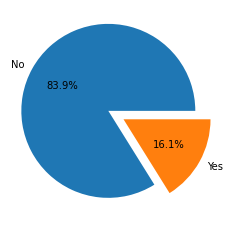

In [31]:
pie = df.groupby('Attrition')['Attrition'].count()
plt.pie(pie,explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%')
plt.show()

83.9% dos funcionários não deixaram a empresa

In [32]:
df.select_dtypes(include=['int64']).dtypes

Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

Gráfico de distribuição das idades

<AxesSubplot:xlabel='Age', ylabel='Density'>

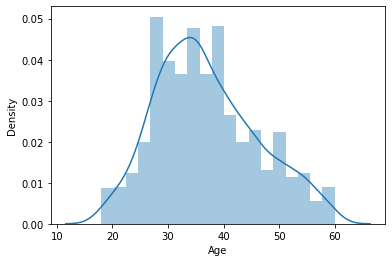

In [33]:
sns.distplot(df['Age'])

In [34]:
df['Age'].value_counts().head()

35    78
34    77
36    69
31    69
29    68
Name: Age, dtype: int64

In [35]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

Excluindo colunas que vão ser insignificantes na análise

In [36]:
df.drop(['EmployeeCount','StandardHours'], axis=1, inplace=True)

Gráfico de correlação entre as variáveis

<AxesSubplot:>

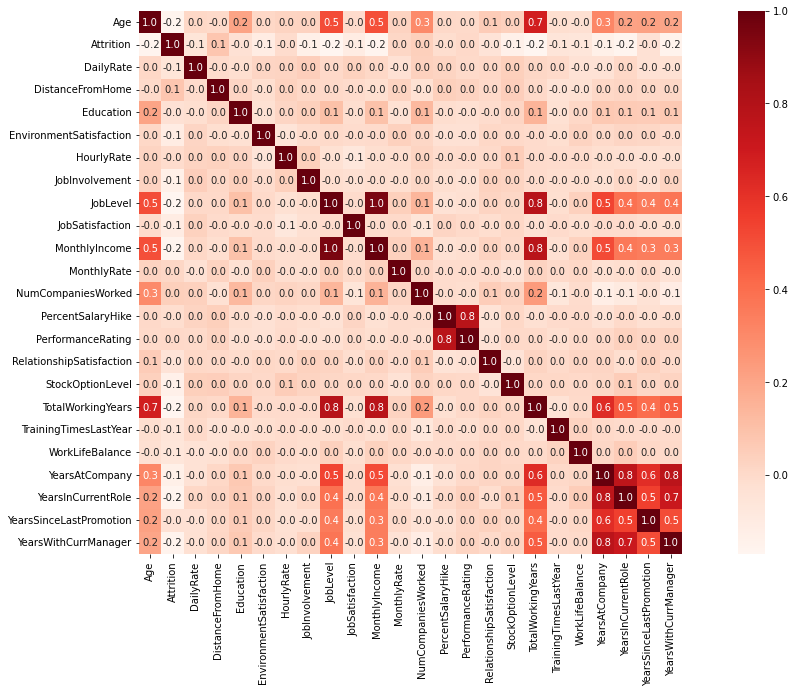

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

Boxplot dos anos trabalhados na empresa

<AxesSubplot:xlabel='YearsAtCompany'>

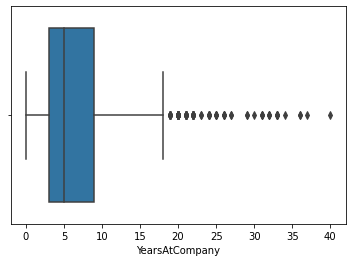

In [38]:
sns.boxplot(df["YearsAtCompany"])

Education - 
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction - 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement - 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction - 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating - 
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction - 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance - 
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [57]:
features = ['RelationshipSatisfaction','WorkLifeBalance','JobSatisfaction','JobInvolvement','EnvironmentSatisfaction','Education']

Função que utiliza o catplot para representar em porcentagem os valores das variáveis.

In [58]:
def count(x,y):
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()+2
        g.ax.text(txt_x,txt_y,txt)
    print()

Analisando as features selecionadas

<Figure size 504x216 with 0 Axes>

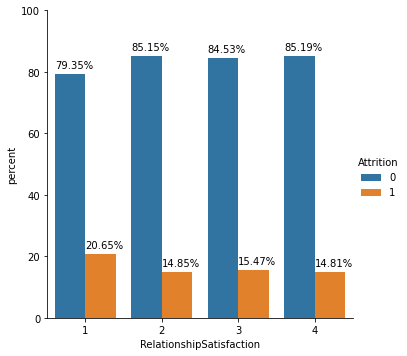

<Figure size 504x216 with 0 Axes>

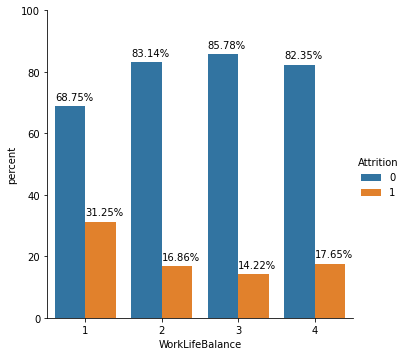

<Figure size 504x216 with 0 Axes>

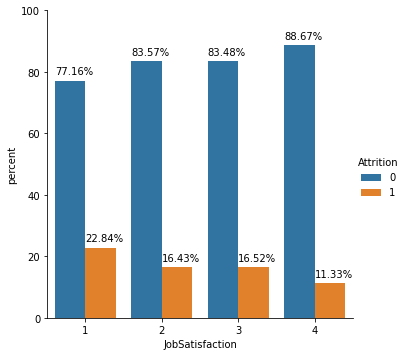

<Figure size 504x216 with 0 Axes>

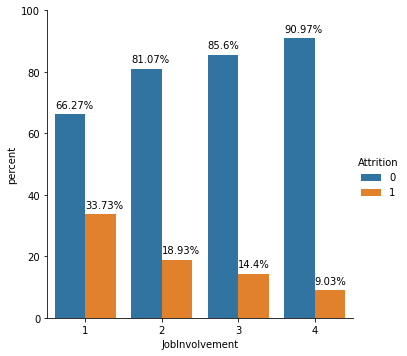

<Figure size 504x216 with 0 Axes>

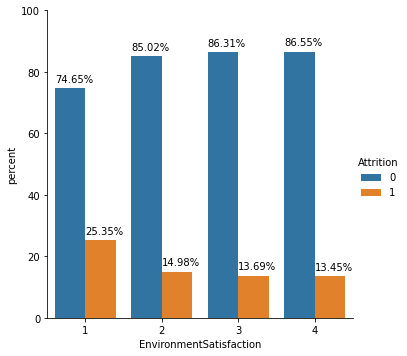

<Figure size 504x216 with 0 Axes>

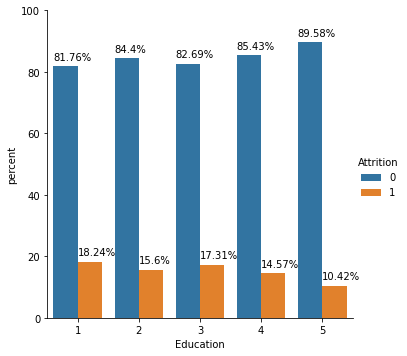

In [79]:
for n in features:
    plt.figure(figsize=(7,3))
    count(n,'Attrition')
    plt.show()


As 4 features que chamaram atenção foram  1 JobInvolvement, 2 Overtime, 3 Work life balance, 4 EnvironmentSatisfaction , 5 Jobsatisfaction, em ordem de mais relevância.
as pessoas que apresentaram nota baixa desses quesitos, mostram maior % de deixar a empresa.

# Predição

Criando duas variáveis X e y para separar as features e a variável que queremos prever respectivamente

In [62]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

Criando uma lista com todos os tipos de encoder para tratar as variáveis categóricas

In [70]:
encoders = [('BackwardDifferenceEncoder',ce.BackwardDifferenceEncoder()),
            ('BaseNEncoder',ce.BaseNEncoder()),
            ('BinaryEncoder',ce.BinaryEncoder()),
            ('CatBoostEncoder',ce.CatBoostEncoder()),
            ('CountEncoder',ce.CountEncoder()),
            ('GLMMEncoder',ce.GLMMEncoder()),
            ('HashingEncoder',ce.HashingEncoder()),
            ('HelmertEncoder',ce.HelmertEncoder()),
            ('JamesSteinEncoder',ce.JamesSteinEncoder()),
            ('LeaveOneOutEncoder',ce.LeaveOneOutEncoder()),
            ('MEstimateEncoder',ce.MEstimateEncoder()),
            ('OneHotEncoder',ce.OneHotEncoder()),
            ('OrdinalEncoder',ce.OrdinalEncoder()),
            ('SumEncoder',ce.SumEncoder()),
            ('PolynomialEncoder',ce.PolynomialEncoder()),
            ('TargetEncoder',ce.TargetEncoder()),
            ('WOEEncoder',ce.WOEEncoder()),
            ('QuantileEncoder',ce.QuantileEncoder())]

Separando os dados para treino e teste

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [72]:
from sklearn.metrics import f1_score,roc_auc_score

Criando um loop for para cada tipo de encoder da lista encoders, criar um pipeline com o modelo LogisticRegression

In [74]:
for nome,encoder in encoders:
    print('--------------------------------------------------------------------------')
    print(f'Encoder: {nome}')
    pipe = Pipeline(steps=[('ohe',encoder),
                           ('clf',LogisticRegression(C=1000,max_iter=10000))])
    pipe.fit(X_train,y_train)
    
    print('Model: Logistic Regression')
    print(f'Modelo de teste Acurácia score: {pipe.score(X_test,y_test):.3f}')
    y_pred = pipe.predict(X_test)
    roc_auc_score(y_test, y_pred)
    print(f'F1_score: {f1_score(y_test, y_pred)}')

--------------------------------------------------------------------------
Encoder: BackwardDifferenceEncoder
Model: Logistic Regression
Modelo de teste Acurácia score: 0.878
F1_score: 0.47058823529411753
--------------------------------------------------------------------------
Encoder: BaseNEncoder
Model: Logistic Regression
Modelo de teste Acurácia score: 0.887
F1_score: 0.5098039215686275
--------------------------------------------------------------------------
Encoder: BinaryEncoder
Model: Logistic Regression
Modelo de teste Acurácia score: 0.887
F1_score: 0.5098039215686275
--------------------------------------------------------------------------
Encoder: CatBoostEncoder
Model: Logistic Regression
Modelo de teste Acurácia score: 0.844
F1_score: 0.16867469879518074
--------------------------------------------------------------------------
Encoder: CountEncoder
Model: Logistic Regression
Modelo de teste Acurácia score: 0.880
F1_score: 0.5046728971962616
--------------------------

O maior valor de F1_score e acurácia foram com o encoder OneHotEncoder

In [67]:
pipe = Pipeline(steps=[('ohe',ce.OneHotEncoder()),
                           ('clf',LogisticRegression(C=1000,max_iter=10000))])
pipe.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print(f'Modelo de treino Acurácia score: {pipe.score(X_train,y_train):.3f}')
print(f'Modelo de teste Acurácia score: {pipe.score(X_test,y_test):.3f}')
print('-----')
y_pred = pipe.predict(X_test)
roc_auc_score(y_test, y_pred)

print(f'F1_score: {f1_score(y_test, y_pred)}')

--------------------------------------------------------------------------
Logistic Regression:
Modelo de treino Acurácia score: 0.888
Modelo de teste Acurácia score: 0.900
-----
F1_score: 0.5769230769230769
